In [1]:
# %matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from matplotlib import cm
import os

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [3]:
n_qubits = 2
D = 101
N = 10000
thetas_res = 100
phis_res = 100
path = "concurrences/batch_instates/"
suffix = "_r"
thetas = np.linspace(0,2*np.pi,thetas_res)
phis = np.linspace(0,2*np.pi,phis_res)
averages = np.zeros((thetas_res,phis_res),np.longdouble)
concurrences = np.zeros((thetas_res,phis_res,N+1))
cwd = os.getcwd()
for b in range(thetas_res):
    for g in range(phis_res):
        n = b * phis_res + g
        filename = str(n) + suffix + ".txt"
        concurrences[b,g,:] = np.genfromtxt(cwd+"/data/"+path+filename, usecols = 0, delimiter=",", dtype = np.longdouble)
        averages[b,g] = np.average(concurrences[b,g,:])

Text(0.043, 0.872, '(a)')

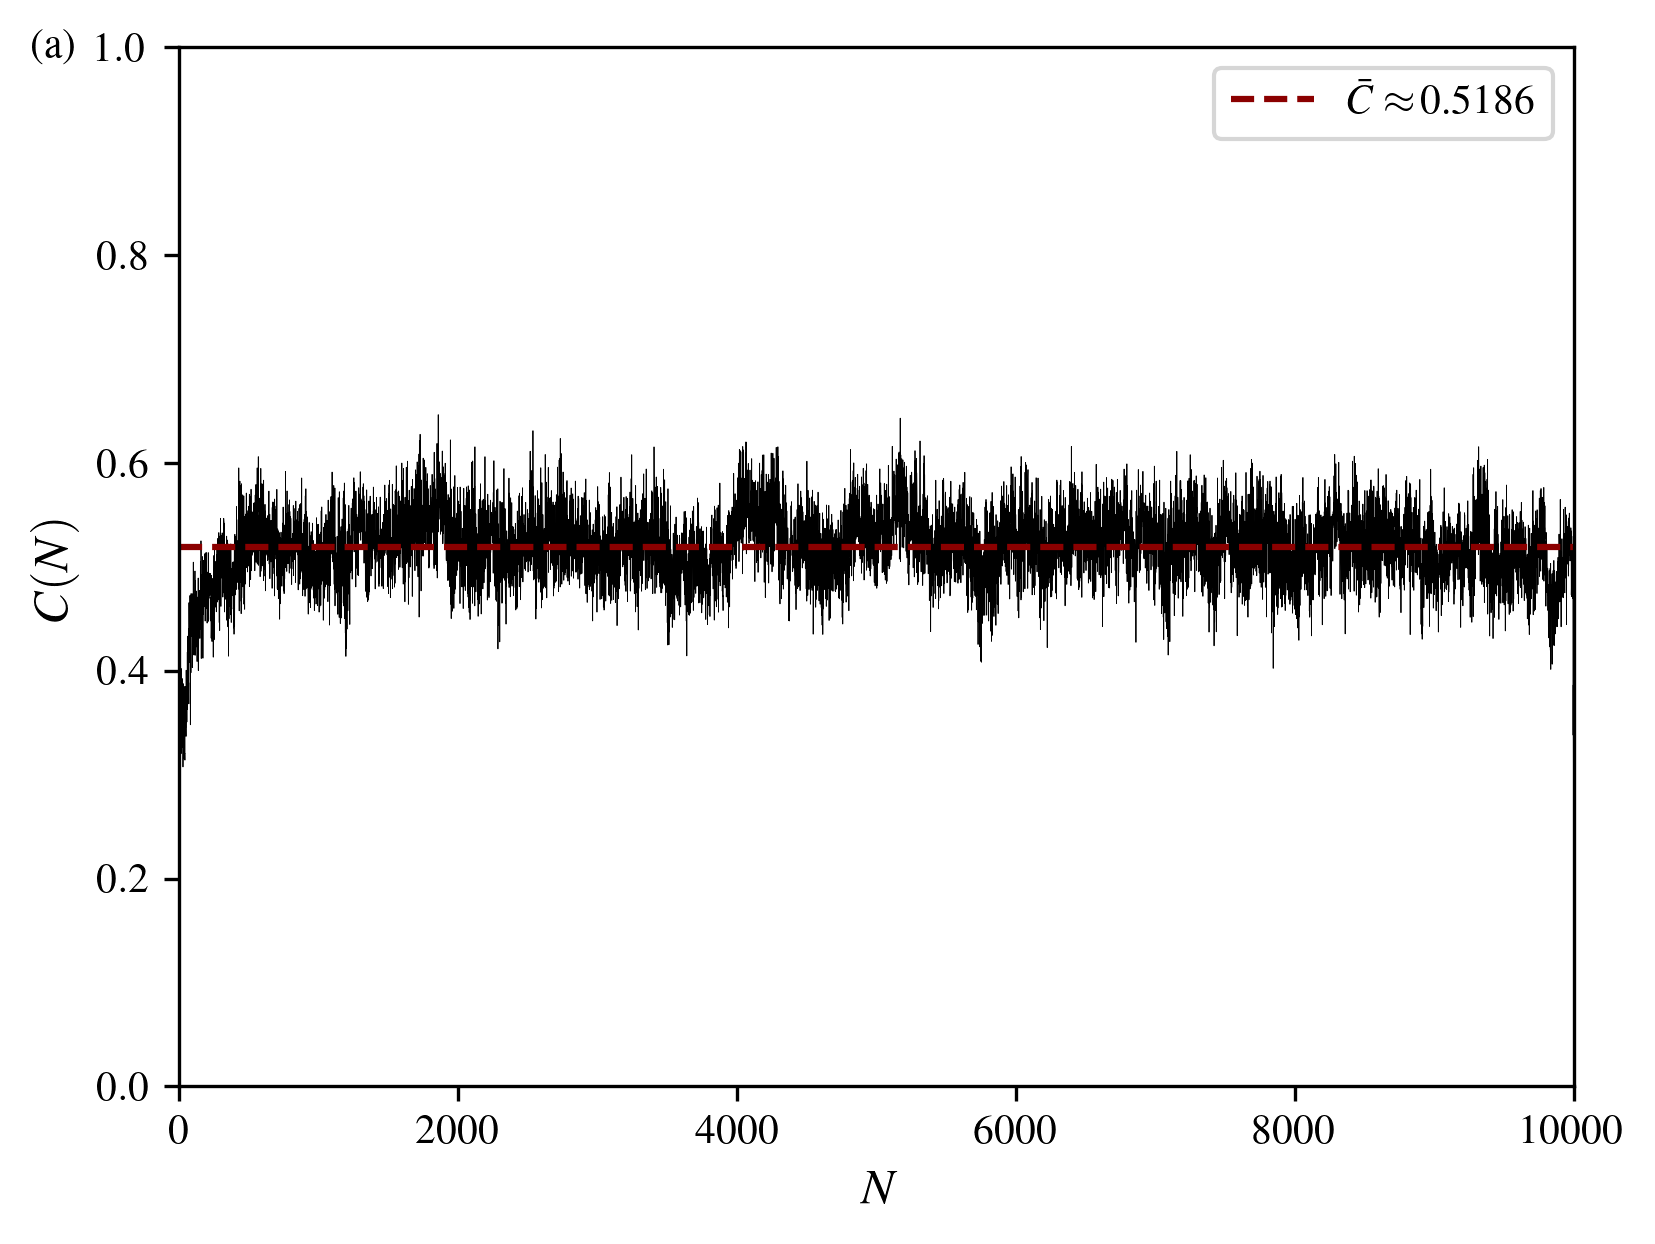

In [4]:
theta_pos = round(thetas_res/8)
phi_pos = round(phis_res/4)

fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.subplots()
times = np.arange(0,N+1,1)
prom = np.average(concurrences[theta_pos,phi_pos,:])
ax.plot(times,concurrences[theta_pos,phi_pos,:],'k',lw=0.2)
ax.plot([-1,N+2],[prom,prom],'--',color='darkred',label=r'$\bar{C}\approx\,$'+str(prom)[:6])
ax.legend()
# ax.set_yticks(np.arange(0.4,0.56,0.04))
ax.set_ylim(0,1)
ax.set_xlim(0,N+1)
# ax.set_ylim(np.min(phi_averages),np.max(phi_averages))
ax.set_xlabel(r'$N$',fontsize=12)
ax.set_ylabel(r'$C(N)$',fontsize=12)
fig.text(0.043,0.872,"(a)")

In [5]:
print(prom)
print(thetas[theta_pos]/np.pi)
print(phis[phi_pos]/np.pi)

0.5186459404819708
0.24242424242424246
0.5050505050505051


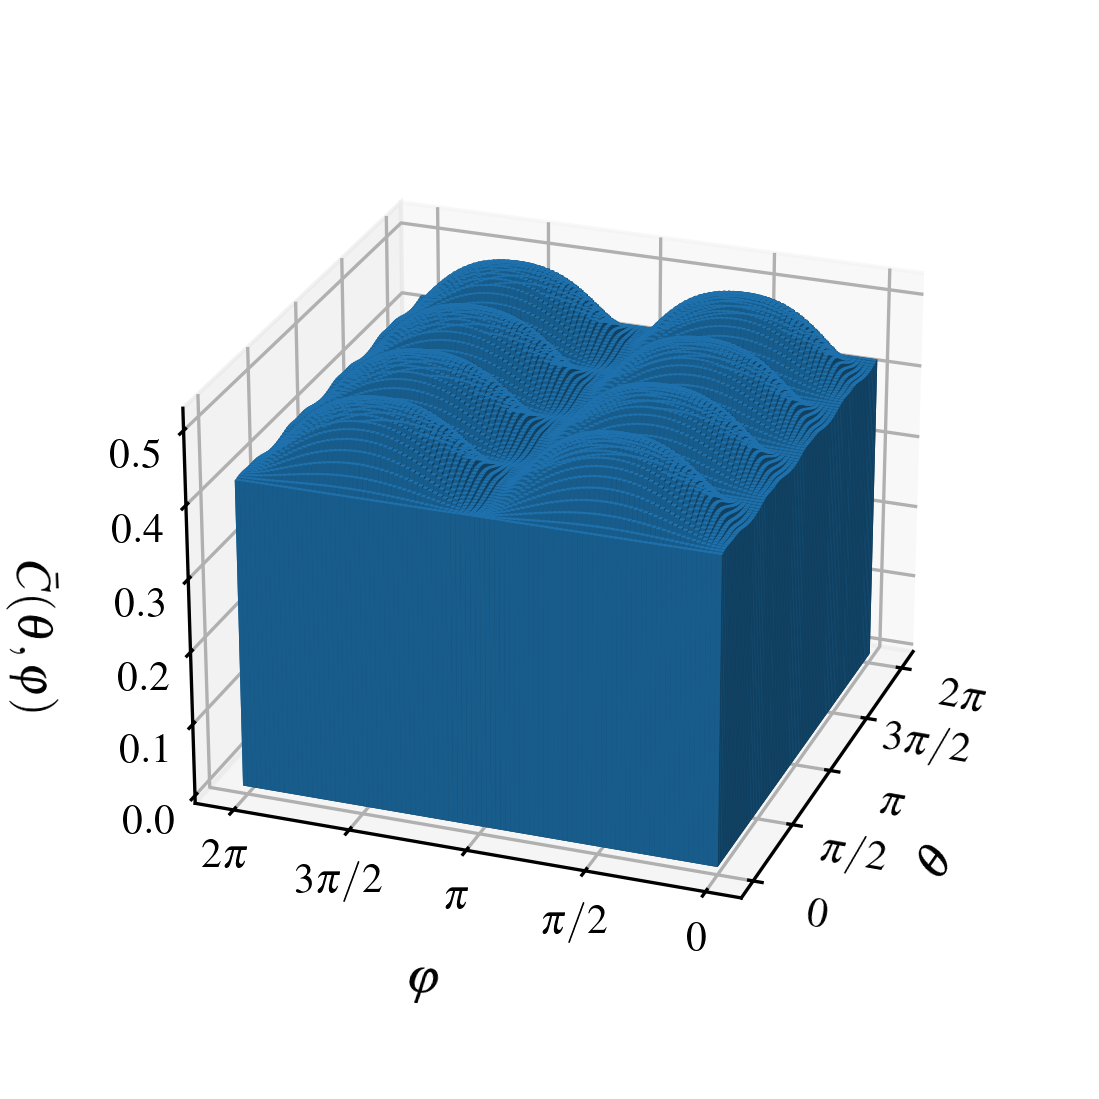

In [6]:
_xx, _yy = np.meshgrid(thetas, phis)
x, y = _xx.ravel(), _yy.ravel()
width = np.max(thetas)/thetas_res
depth = np.max(phis)/phis_res
light = LightSource(azdeg=315,altdeg=60)
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=25,azim=-160,roll=0)
ax.set_xlabel(r'$\theta$',fontsize=12)
ax.set_xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],[r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'],rotation=-10,verticalalignment='bottom',horizontalalignment='center')
ax.tick_params('x',pad=7)
ax.set_ylabel(r'$\varphi$',fontsize=12)
ax.set_yticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],[r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
ax.tick_params('y',pad=-2)
ax.set_zlabel(r'$\bar{C}(\theta,\varphi)$',fontsize=12)
ax.tick_params('z',pad=0)
low_lim = 0
disp = 0
ax.set_zlim(low_lim+disp,np.max(averages)+disp)
ax.set_box_aspect(None, zoom=0.85)
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
ax.zaxis.labelpad = 5
ax.bar3d(x,y,low_lim+disp,width,depth,averages.flatten('F')-low_lim-disp,lightsource=light)

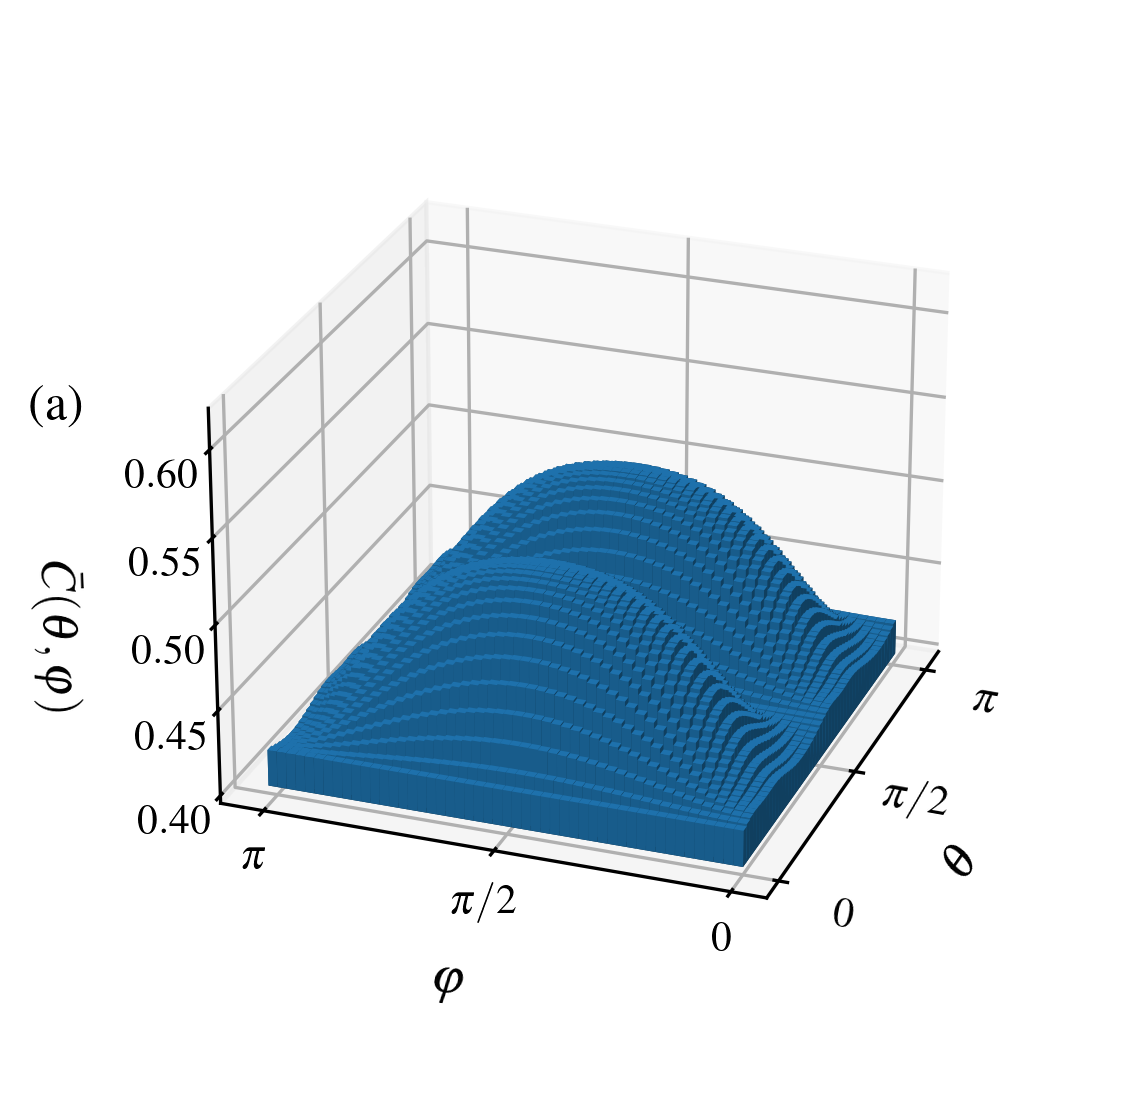

In [7]:
halfthetas_res = round(thetas_res/2)
halfphis_res = round(phis_res/2)
halfthetas = np.linspace(0,np.pi,halfthetas_res)
halfphis = np.linspace(0,np.pi,halfphis_res)
_xx, _yy = np.meshgrid(halfthetas,halfphis)
x, y = _xx.ravel(), _yy.ravel()
width = np.max(halfthetas)/halfthetas_res
depth = np.max(halfphis)/halfphis_res
halfaverages = averages[:halfthetas_res,:halfphis_res]
light = LightSource(azdeg=315,altdeg=60)
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=25,azim=-160,roll=0)
ax.set_xlabel(r'$\theta$',fontsize=12)
ax.set_xticks([0,np.pi/2,np.pi],[r'$0$',r'$\pi/2$',r'$\pi$'],rotation=-10,verticalalignment='bottom',horizontalalignment='center')
ax.tick_params('x',pad=7)
ax.set_ylabel(r'$\varphi$',fontsize=12)
ax.set_yticks([0,np.pi/2,np.pi],[r'$0$',r'$\pi/2$',r'$\pi$'])
ax.tick_params('y',pad=-2)
ax.set_zlabel(r'$\bar{C}(\theta,\varphi)$',fontsize=12)
ax.tick_params('z',pad=0)
low_lim = 0
disp = 0.4
top_disp = 0.3
ax.set_zlim(low_lim+disp,np.max(averages)+disp-top_disp)
ax.set_box_aspect(None, zoom=0.85)
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
ax.zaxis.labelpad = 5
fig.text(0.225,0.6,'(a)', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax.bar3d(x,y,low_lim+disp,width,depth,halfaverages.flatten('F')-low_lim-disp,lightsource=light)

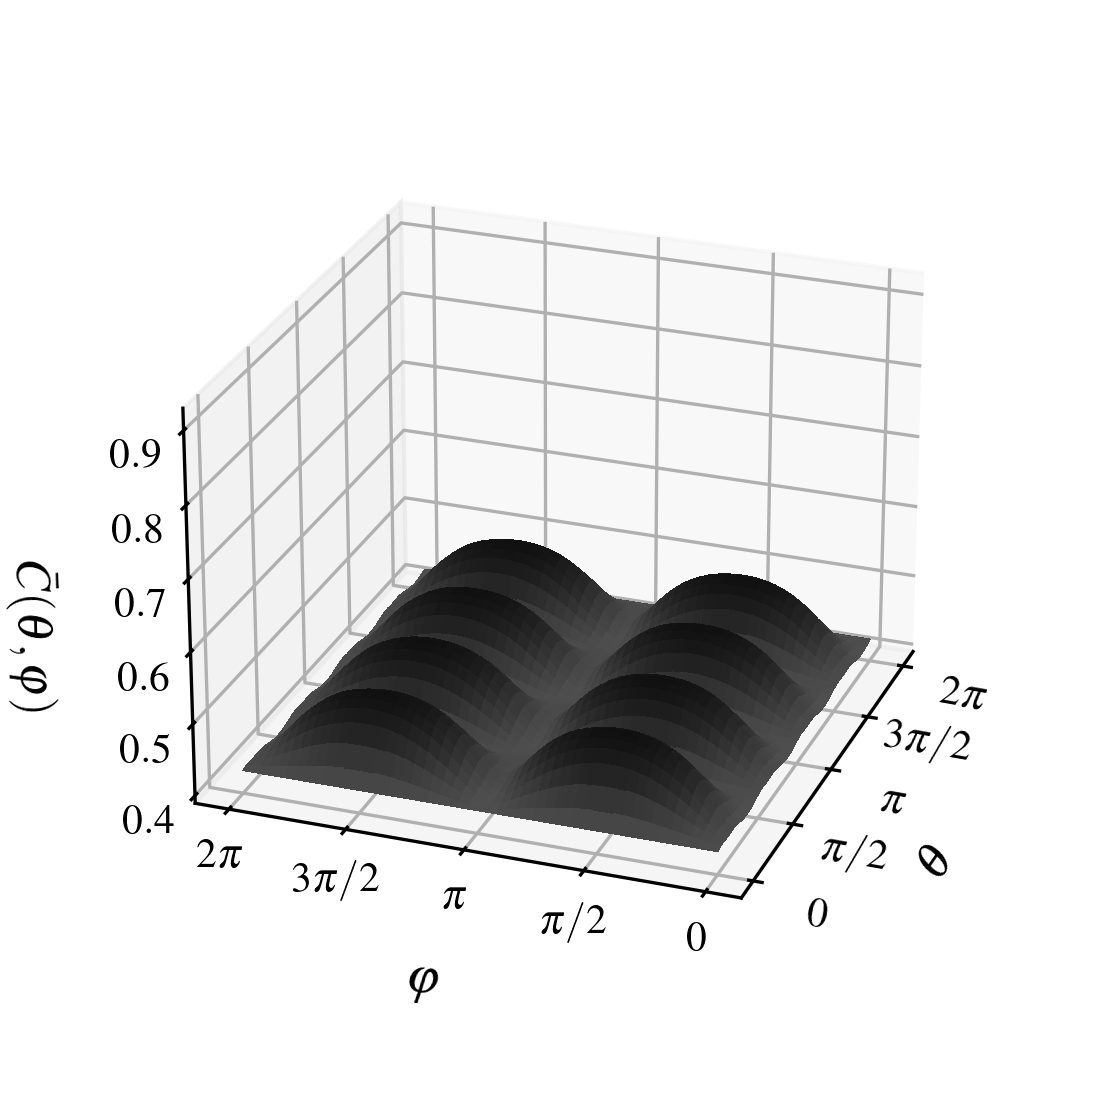

In [8]:
_xx, _yy = np.meshgrid(thetas, phis)
x, y = _xx.ravel(), _yy.ravel()
width = np.max(thetas)/thetas_res
depth = np.max(phis)/phis_res
light = LightSource(azdeg=315,altdeg=60)
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=25,azim=-160,roll=0)
ax.set_xlabel(r'$\theta$',fontsize=12)
ax.set_xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],[r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'],rotation=-10,verticalalignment='bottom',horizontalalignment='center')
ax.tick_params('x',pad=7)
ax.set_ylabel(r'$\varphi$',fontsize=12)
ax.set_yticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],[r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
ax.tick_params('y',pad=-2)
ax.set_zlabel(r'$\bar{C}(\theta,\varphi)$',fontsize=12)
ax.tick_params('z',pad=0)
low_lim = 0
disp = 0.4
ax.set_zlim(low_lim+disp,np.max(averages)+disp)
# ax.set_zlim(np.min(averages),np.max(averages))
ax.set_box_aspect(None, zoom=0.85)
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
ax.zaxis.labelpad = 5
surf = ax.plot_surface(_xx, _yy, averages.transpose(), cmap=cm.Greys,linewidth=0, antialiased=False,vmin=0,vmax=0.55)

In [9]:
opts = np.argmax(averages)

In [42]:
full_thetas_res = 1000
full_thetas = np.linspace(0,2*np.pi,full_thetas_res)
beta = np.pi/2
theta_averages = np.zeros((full_thetas_res),np.longdouble)
theta_concurrences = np.zeros((full_thetas_res,N+1))
cwd = os.getcwd()
for b in range(full_thetas_res):
    filename = str(b) + "_theta" + suffix + ".txt"
    theta_concurrences[b,:] = np.genfromtxt(cwd+"/data/"+path+filename, usecols = 0, delimiter=",", dtype = np.longdouble)
    theta_averages[b] = np.average(theta_concurrences[b,:])

Text(0, 0.5, '$\\bar{C}(\\theta,\\pi/2)$')

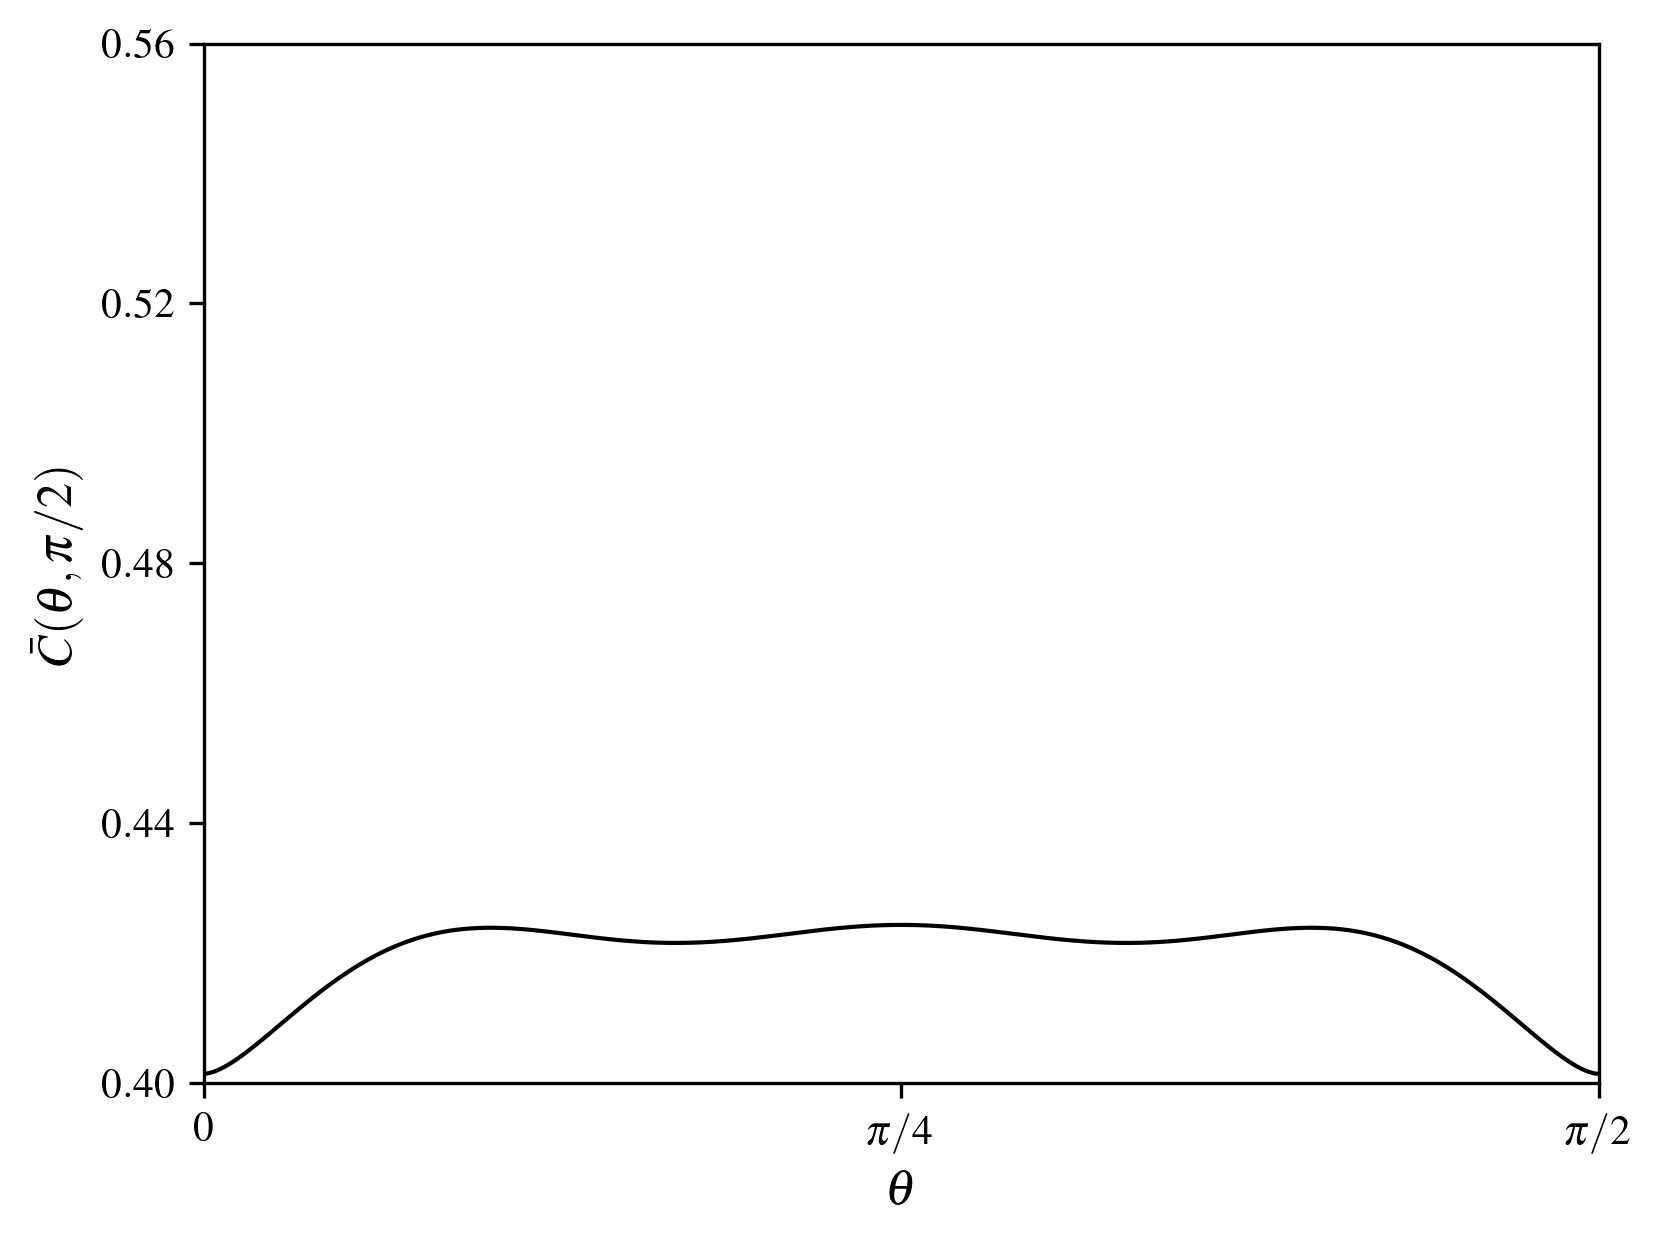

In [43]:
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.subplots()
ticks = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
labels = ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$']
ax.plot(full_thetas,theta_averages,'k',lw=1)
ax.set_xticks(ticks,labels)
ax.set_xlim(0,np.pi/2)
ax.set_yticks(np.arange(0.4,0.56,0.04))
ax.set_ylim(0.4,0.56)
ax.set_xlabel(r'$\theta$',fontsize=12)
ax.set_ylabel(r'$\bar{C}(\theta,\pi/2)$',fontsize=12)

In [30]:
full_phis_res = 100
full_phis = np.linspace(0,2*np.pi,full_phis_res)
beta = np.pi/2
phi_averages = np.zeros((full_phis_res),np.longdouble)
phi_concurrences = np.zeros((full_phis_res,N+1))
cwd = os.getcwd()
for b in range(full_phis_res):
    filename = str(b) + "_phi" + suffix + ".txt"
    phi_concurrences[b,:] = np.genfromtxt(cwd+"/data/"+path+filename, usecols = 0, delimiter=",", dtype = np.longdouble)
    phi_averages[b] = np.average(phi_concurrences[b,:])

Text(0, 0.5, '$\\bar{C}(\\pi/4,\\varphi)$')

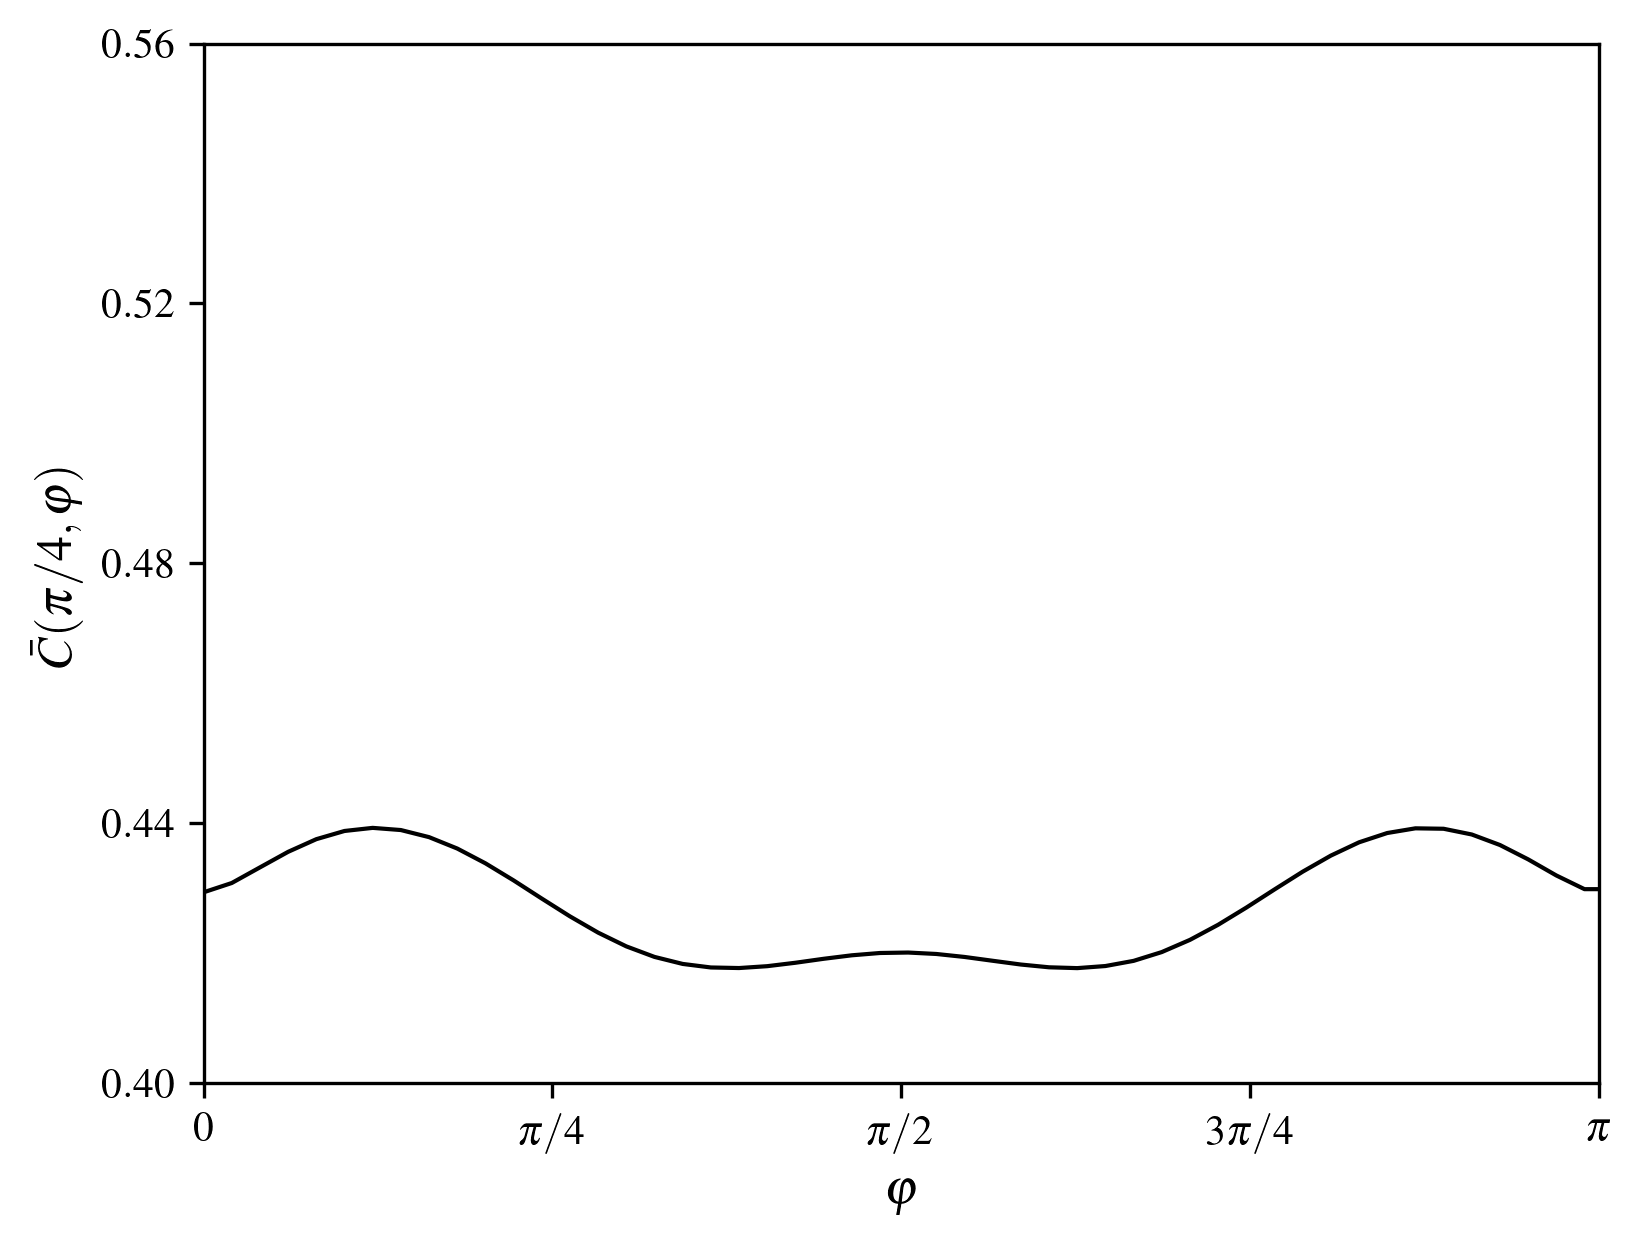

In [31]:
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.subplots()
ticks = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi,5*np.pi/4,3*np.pi/2,7*np.pi/4,2*np.pi]
labels = ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$',r'$2\pi$']
ax.plot(full_phis,phi_averages,'k',lw=1)
ax.set_xticks(ticks,labels)
ax.set_xlim(0,1*np.pi)
ax.set_yticks(np.arange(0.4,0.56,0.04))
ax.set_ylim(0.4,0.56)
# ax.set_ylim(np.min(phi_averages),np.max(phi_averages))
ax.set_xlabel(r'$\varphi$',fontsize=12)
ax.set_ylabel(r'$\bar{C}(\pi/4,\varphi)$',fontsize=12)

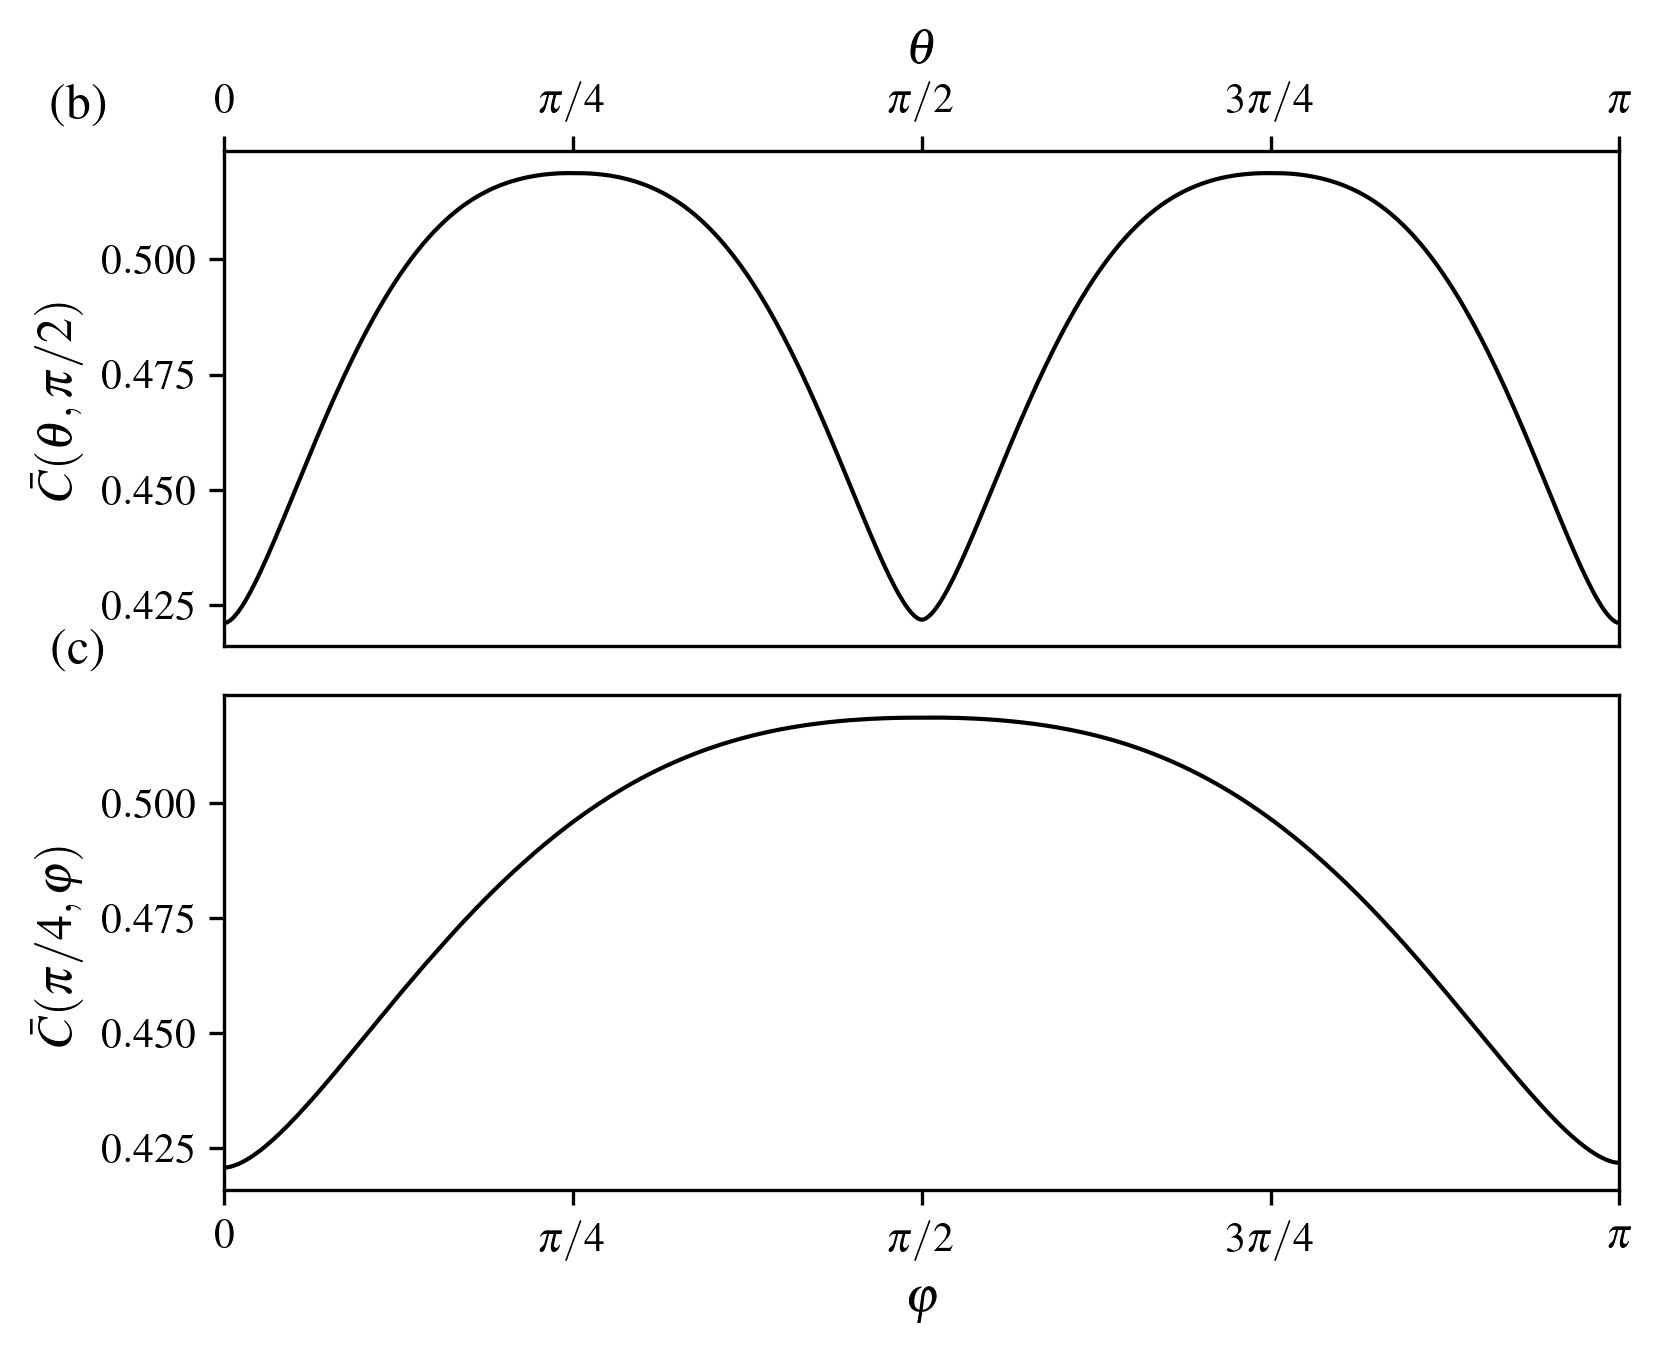

In [14]:
fig.clear()
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,4.5),dpi=300,sharex=True)
ax1.set_xlim(0,np.pi)
ax1.set_xlabel(r'$\theta$',fontsize=12)
ax1.set_ylabel(r'$\bar{C}(\theta,\pi/2)$',fontsize=12)
ax1.xaxis.set_label_position('top')
ax1.set_xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi],[r'$0$',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
ax1.tick_params('x',bottom=False,top=True,labelbottom=False,labeltop=True)
ax1.text(-0.325,0.533, '(b)', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax2.set_xlim(0,np.pi)
ax2.text(-0.325,0.533, '(c)', horizontalalignment='center', verticalalignment='center', fontsize=12)
ax2.set_xlabel(r'$\varphi$',fontsize=12)
ax2.set_ylabel(r'$\bar{C}(\pi/4,\varphi)$',fontsize=12)
ax1.plot(full_thetas,theta_averages,'k',lw=1)
ax2.plot(full_phis,phi_averages,'k',lw=1)
fig.subplots_adjust(hspace=0.1)
# plt.tight_layout()

In [9]:
filename = "0optimal_state_r.txt"
path = "concurrences/batch_instates/"
cwd = os.getcwd()
large_conc = np.genfromtxt(cwd+"/data/"+path+filename, usecols = 0, delimiter=",", dtype = np.longdouble)
N = large_conc.size

Text(0.043, 0.872, '(b)')

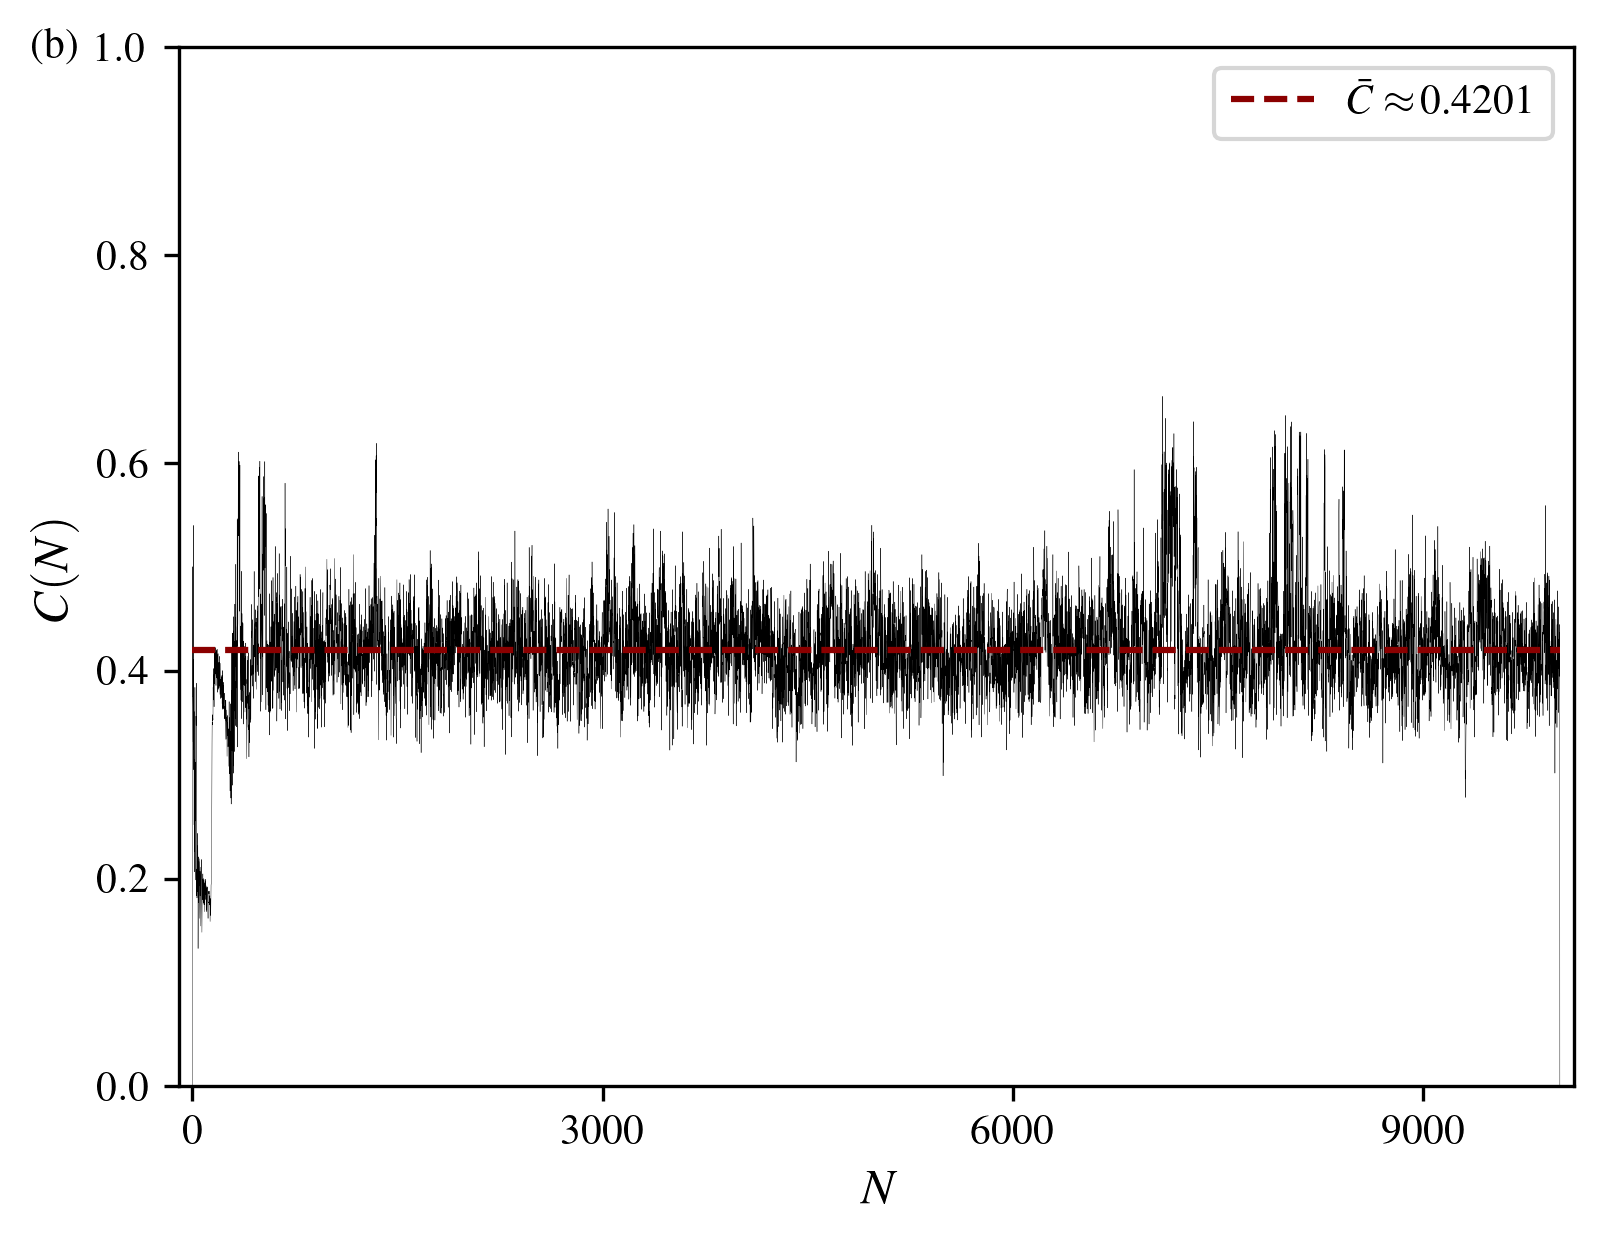

In [10]:
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.subplots()
times = np.arange(0,N,1)
prom = np.average(large_conc)
ax.plot(times,large_conc,'k',lw=0.1)
ax.plot([-1,N+2],[prom,prom],'--',color='darkred',label=r'$\bar{C}\approx\,$'+str(prom)[:6])
ax.legend()
# ax.set_yticks(np.arange(0.4,0.56,0.04))
ax.set_ylim(0,1)
ax.set_xlim(-100,N+100)
ax.xaxis.set_ticks(np.arange(0,N,3000))
# ax.set_ylim(np.min(phi_averages),np.max(phi_averages))
ax.set_xlabel(r'$N$',fontsize=12)
ax.set_ylabel(r'$C(N)$',fontsize=12)
fig.text(0.043,0.872,"(b)")

In [51]:
full_thetas_res = 100
full_thetas = np.linspace(0,2*np.pi,full_thetas_res)
beta = np.pi/2
cwd = os.getcwd()
suffix = "_o"
filename = "concurrences_theta"+suffix
path = "concurrences/batch_instates/"
theta_concurrences = np.genfromtxt(cwd+"/data/"+path+filename+".txt", usecols = 0, delimiter=",", dtype = np.longdouble)

Text(0, 0.5, '$\\bar{C}(\\theta,\\pi/2)$')

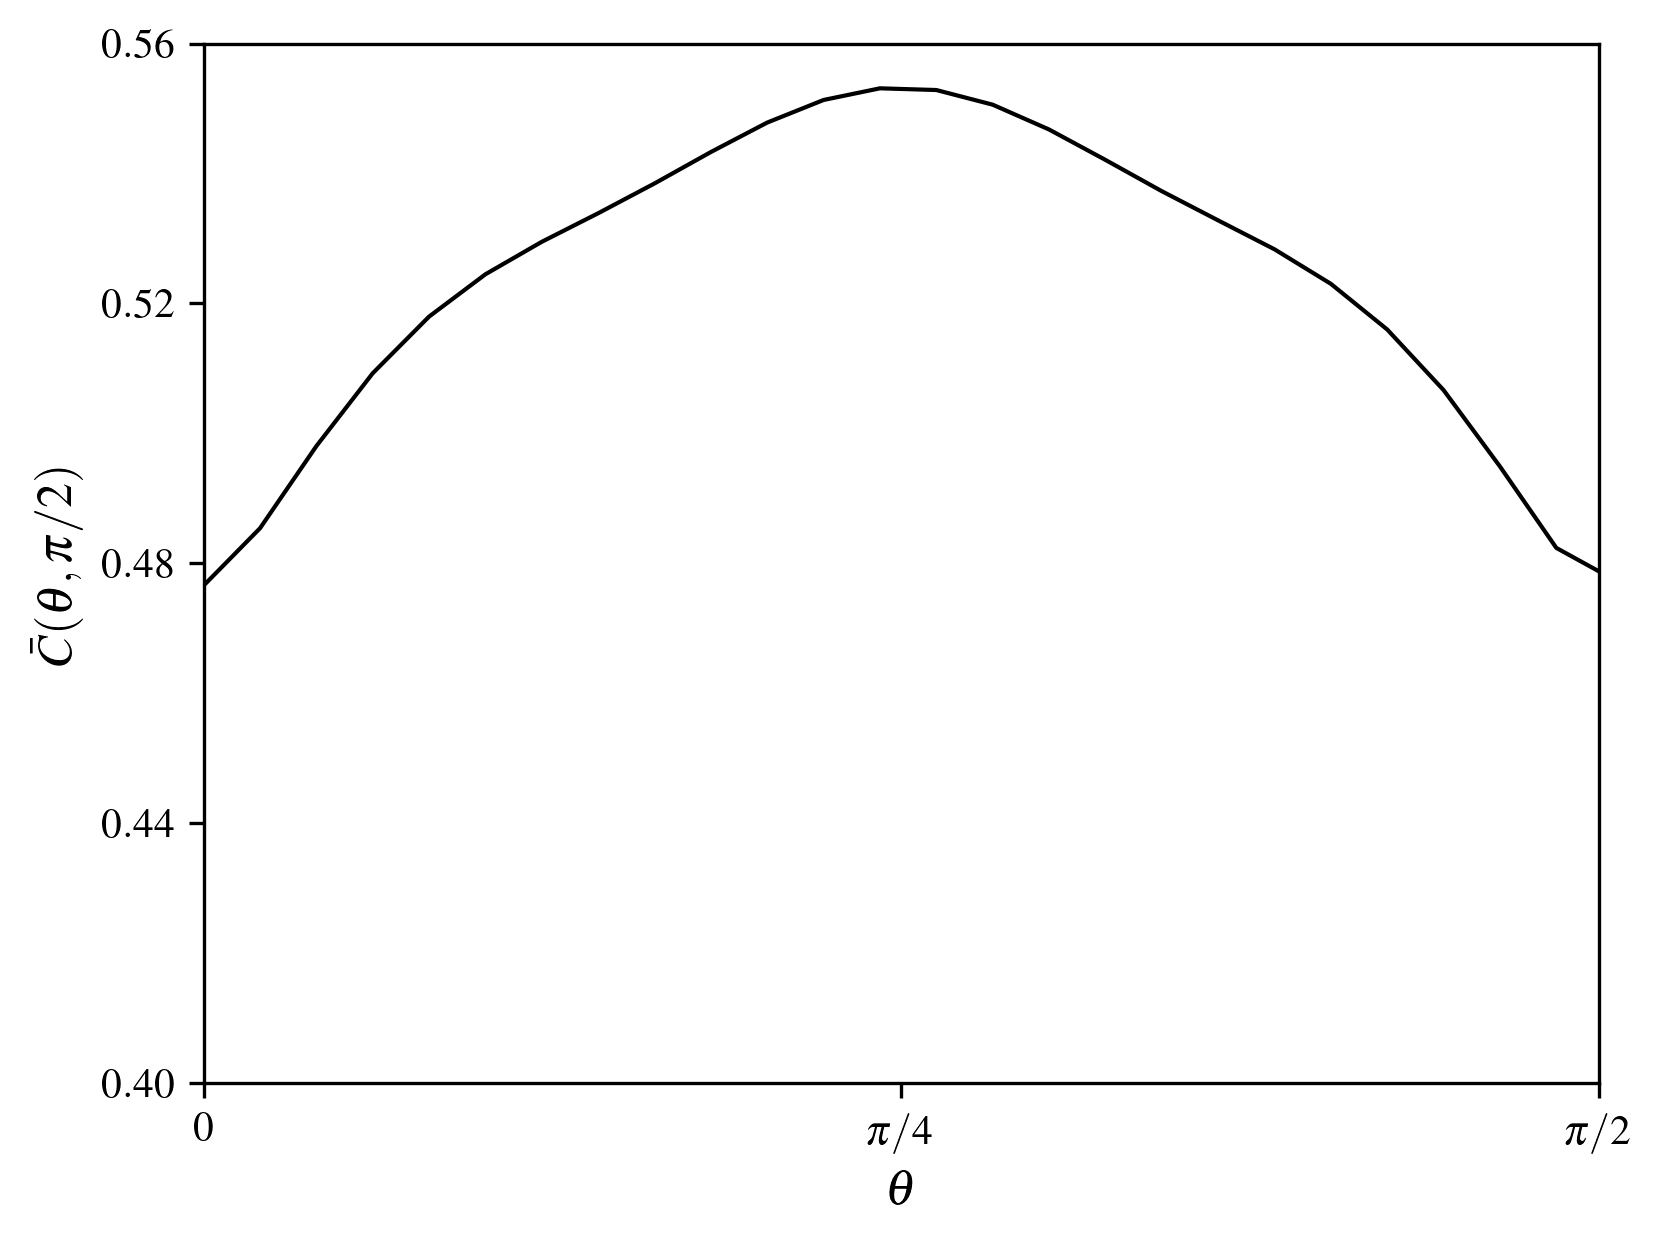

In [52]:
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.subplots()
ticks = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
labels = ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$']
ax.plot(full_thetas,theta_concurrences,'k',lw=1)
ax.set_xticks(ticks,labels)
ax.set_xlim(0,np.pi/2)
ax.set_yticks(np.arange(0.4,0.56,0.04))
ax.set_ylim(0.4,0.56)
ax.set_xlabel(r'$\theta$',fontsize=12)
ax.set_ylabel(r'$\bar{C}(\theta,\pi/2)$',fontsize=12)